In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The equation we are going to solve now is:

$$
\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}=0
$$

The second term of the equation now is non-linear (because $u$ will not be constant as it was $c$). The discretization that will be used is the same as before:

$$
\dfrac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t}+u^{n}_{i}\dfrac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x}=0
$$

Solving the equation for the only unkown $\left( u_i^{n+1} \right)$, it yields:

$$
u^{n+1}_{i}=u^n_i-u^n_i\dfrac{\Delta t}{\Delta x} \left( u^{n}_{i}-u^{n}_{i-1} \right)
$$

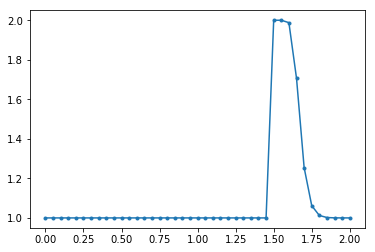

In [15]:
nx = 41
dx = 2/(nx-1)
nt = 20
dt = 0.025

u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2

un = np.zeros(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - un[i] * dt/dx *(un[i]-un[i-1])
        
plt.plot(np.linspace(0,2,nx),u,'.-')

### Convergence and CFL condition

In [21]:
def linearconv(gridSize):
    nx = gridSize
    dx = 2/(nx-1)
    nt = 20
    dt = 0.025
    c = 1
    
    u = np.ones(nx)
    u[int(0.5/dx):int(1/dx+1)] = 2

    un = np.zeros(nx)

    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i] - c * dt/dx *(un[i]-un[i-1])

    plt.plot(np.linspace(0,2,nx),u,'.-')

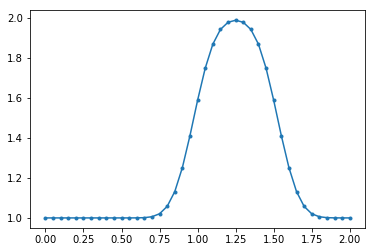

In [17]:
linearconv(41)

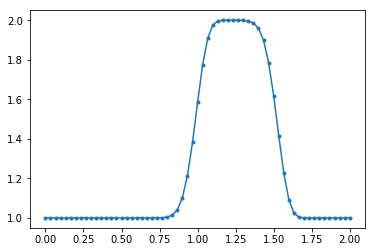

In [18]:
linearconv(61)

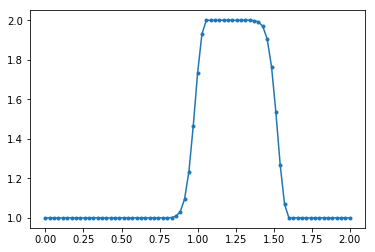

In [19]:
linearconv(71)

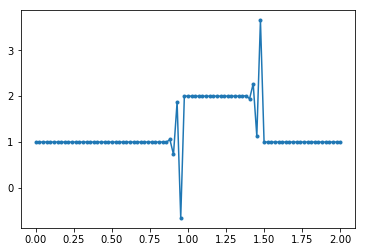

In [20]:
linearconv(85)

This results are due to instabilities in the integration process. The wave is travelling a distance greater than $\Delta x$ in each timestep $\Delta t$. To ensure stability, $\Delta t$ time step can be calculated with the size of the x-axis discretization:

$$
\sigma (CFL) = \dfrac{u \Delta t}{\Delta x} \leqslant \sigma_{max}
$$

Computing the new $\Delta t$ with the size of the cells, the code is:

In [23]:
def linearconv(gridSize):
    nx = gridSize
    dx = 2/(nx-1)
    nt = 20
    c = 1
    cfl = 0.5
    dt = dx*cfl/c
    
    u = np.ones(nx)
    u[int(0.5/dx):int(1/dx+1)] = 2

    un = np.zeros(nx)

    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i] - c * dt/dx *(un[i]-un[i-1])

    plt.plot(np.linspace(0,2,nx),u,'.-')

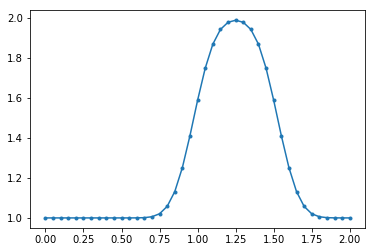

In [24]:
linearconv(41)

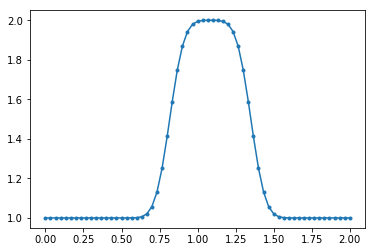

In [25]:
linearconv(61)

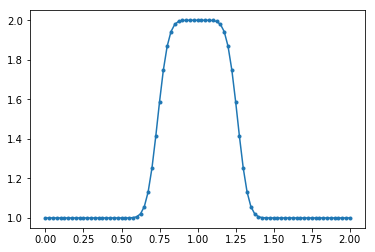

In [26]:
linearconv(81)

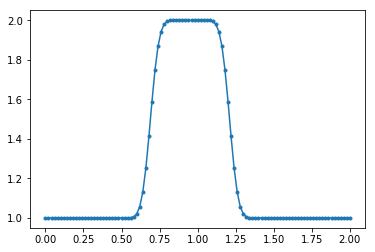

In [29]:
linearconv(101)

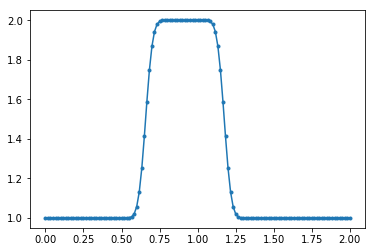

In [30]:
linearconv(121)

Wave moves less because the number of time iterations has been kept the same ($\texttt{nt=20}$) while reducing $\Delta t$ (due to the reduction of $\Delta x$ and in order to mantain a stable CFL number)